источник данных

https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

2024-04-03 19:35:09.492958: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 19:35:09.980112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
train = 'archive/seg_train/seg_train'
val = 'archive/seg_test/seg_test'
pred = 'archive/seg_pred/seg_pred'

In [8]:
def create_DF(path):
    label=[]
    data=[]
    folder=os.listdir(path)
    for fold in folder:
        fold_path=os.path.join(path,fold)
        files=os.listdir(fold_path)
        for file in files:
            file_path=os.path.join(fold_path,file)
            data.append(file_path)
            label.append(fold)
    LS = pd.Series(label, name= 'label')
    DS = pd.Series(data, name='file')
    DF=pd.concat([DS, LS], axis= 1)
    return DF

In [9]:
train_df=create_DF(train)
val_df=create_DF(val)

In [12]:
image_size=150
batch_size=32
LR=0.001

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                   rotation_range=10,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                   vertical_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .1)

In [13]:
train_set = train_datagen.flow_from_dataframe( train_df, x_col= 'file', y_col= 'label',
                                                 target_size= (image_size,image_size), class_mode= 'categorical',
                                         shuffle= True, batch_size= batch_size)
val_set = test_datagen.flow_from_dataframe( val_df, x_col= 'file', y_col= 'label',
                                                 target_size= (image_size,image_size), class_mode= 'categorical',
                                         shuffle= True, batch_size= batch_size)

Found 4214 validated image filenames belonging to 6 classes.
Found 903 validated image filenames belonging to 6 classes.


In [67]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras import optimizers
optimizer = optimizers.Adam()
model1 = Sequential([
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
      layers.Dense(6, activation='softmax')
  ])
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_480         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
history1 = model1.fit(train_set,epochs=10,
                                   steps_per_epoch=train_set.samples // batch_size,verbose=2,
                                  validation_data=val_set,
                                      validation_steps=val_set.samples // batch_size)

Epoch 1/10
131/131 - 20s - 156ms/step - accuracy: 0.3926 - loss: 1.6190 - val_accuracy: 0.4598 - val_loss: 1.3885
Epoch 2/10
131/131 - 0s - 629us/step - accuracy: 0.3438 - loss: 0.7278 - val_accuracy: 0.5714 - val_loss: 0.8261
Epoch 3/10


2024-04-03 13:00:55.274143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/wsl/miniconda3/envs/tf/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-03 13:00:55.285610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 18s - 137ms/step - accuracy: 0.4548 - loss: 1.4042 - val_accuracy: 0.3795 - val_loss: 1.5403
Epoch 4/10
131/131 - 0s - 683us/step - accuracy: 0.4688 - loss: 0.7405 - val_accuracy: 0.4286 - val_loss: 0.6122
Epoch 5/10


2024-04-03 13:01:13.348154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 13:01:13.359626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 18s - 138ms/step - accuracy: 0.4553 - loss: 1.3952 - val_accuracy: 0.4085 - val_loss: 1.4882
Epoch 6/10
131/131 - 0s - 596us/step - accuracy: 0.4375 - loss: 0.6433 - val_accuracy: 0.4286 - val_loss: 0.8505
Epoch 7/10


2024-04-03 13:01:31.450795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 13:01:31.459094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 19s - 147ms/step - accuracy: 0.4572 - loss: 1.3757 - val_accuracy: 0.4922 - val_loss: 1.3120
Epoch 8/10
131/131 - 0s - 592us/step - accuracy: 0.5625 - loss: 0.6768 - val_accuracy: 1.0000 - val_loss: 0.2135
Epoch 9/10


2024-04-03 13:01:50.814852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 13:01:50.824296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 18s - 140ms/step - accuracy: 0.4605 - loss: 1.3612 - val_accuracy: 0.5100 - val_loss: 1.2963
Epoch 10/10
131/131 - 0s - 603us/step - accuracy: 0.4062 - loss: 0.7294 - val_accuracy: 0.2857 - val_loss: 1.0724


2024-04-03 13:02:09.195733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 13:02:09.204885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


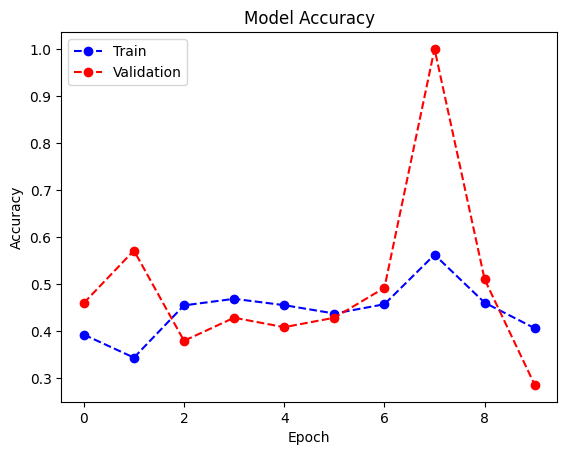

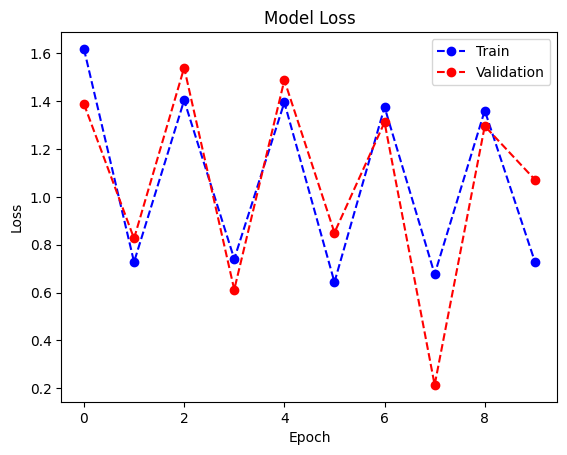

In [72]:
plt.plot(history1.history['accuracy'],'bo--', label='Train')
plt.plot(history1.history['val_accuracy'],'ro--', label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history1.history['loss'],'bo--', label='Train')
plt.plot(history1.history['val_loss'],'ro--', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()  

In [61]:
from keras.applications import ResNet152V2
re_model=ResNet152V2(input_shape=(image_size, image_size, 3), include_top=False, weights="imagenet")
for layer in re_model.layers:
  layer.trainable=False

In [62]:
optimizer = optimizers.Adam(learning_rate = 0.0001)
model2 = Sequential([
    re_model,
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
      layers.Dense(6, activation='softmax')
  ])
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ ?                      │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_479         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,331,648 (222.52 MB)

In [63]:
history2 = model2.fit(train_set,epochs=10,
                                   steps_per_epoch=train_set.samples // batch_size,verbose=2,
                                  validation_data=val_set,
                                      validation_steps=val_set.samples // batch_size)

Epoch 1/10
131/131 - 296s - 2s/step - accuracy: 0.7726 - loss: 0.7107 - val_accuracy: 0.8594 - val_loss: 0.4864
Epoch 2/10


2024-04-03 12:29:41.480220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/wsl/miniconda3/envs/tf/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-03 12:29:42.159008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 3s - 24ms/step - accuracy: 0.7500 - loss: 0.3358 - val_accuracy: 0.7143 - val_loss: 0.2682
Epoch 3/10
131/131 - 297s - 2s/step - accuracy: 0.8341 - loss: 0.4968 - val_accuracy: 0.8638 - val_loss: 0.4047
Epoch 4/10


2024-04-03 12:34:41.907316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 3s - 21ms/step - accuracy: 0.8125 - loss: 0.1936 - val_accuracy: 1.0000 - val_loss: 0.0336
Epoch 5/10


2024-04-03 12:34:42.577161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 307s - 2s/step - accuracy: 0.8520 - loss: 0.3973 - val_accuracy: 0.8761 - val_loss: 0.3946
Epoch 6/10


2024-04-03 12:39:51.878184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 3s - 20ms/step - accuracy: 0.9062 - loss: 0.1651 - val_accuracy: 0.8571 - val_loss: 0.3551
Epoch 7/10


2024-04-03 12:39:52.450696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 280s - 2s/step - accuracy: 0.8620 - loss: 0.3910 - val_accuracy: 0.8750 - val_loss: 0.3731
Epoch 8/10


2024-04-03 12:44:34.644684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 2s - 17ms/step - accuracy: 0.8750 - loss: 0.1310 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 9/10


2024-04-03 12:44:35.162406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 297s - 2s/step - accuracy: 0.8750 - loss: 0.3352 - val_accuracy: 0.8828 - val_loss: 0.3629
Epoch 10/10


2024-04-03 12:49:33.752778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 2s - 16ms/step - accuracy: 0.8182 - loss: 0.2104 - val_accuracy: 0.8571 - val_loss: 0.1465


2024-04-03 12:49:34.279533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


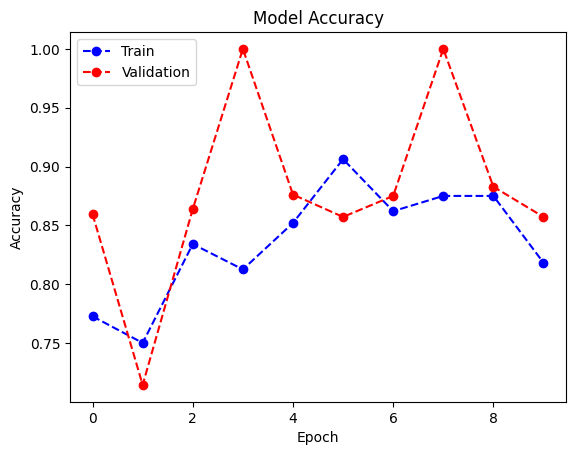

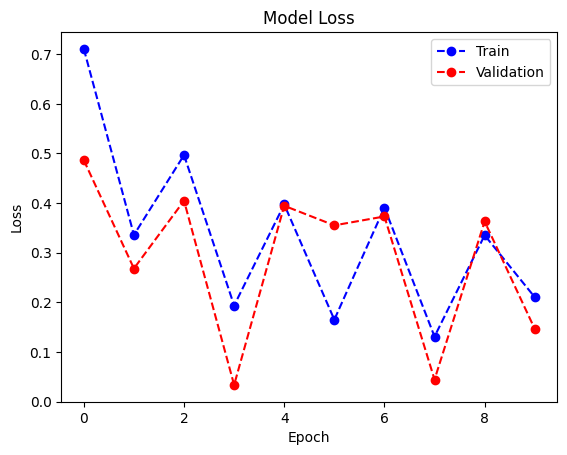

In [64]:
plt.plot(history2.history['accuracy'],'bo--', label='Train')
plt.plot(history2.history['val_accuracy'],'ro--', label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history2.history['loss'],'bo--', label='Train')
plt.plot(history2.history['val_loss'],'ro--', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()  

In [53]:
from keras.applications import InceptionV3
re_model_Inc=InceptionV3(input_shape=(image_size, image_size, 3), include_top=False, weights="imagenet")
for layer in re_model_Inc.layers:
  layer.trainable=False

In [54]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=0.0001)
model3 = Sequential([
    re_model_Inc,
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
      layers.Dense(6, activation='softmax')
  ])
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_383         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [55]:
history3 = model3.fit(train_set,epochs=10,
                                   steps_per_epoch=train_set.samples // batch_size,verbose=2,
                                  validation_data=val_set,
                                      validation_steps=val_set.samples // batch_size)

Epoch 1/10
131/131 - 53s - 401ms/step - accuracy: 0.3109 - loss: 1.9073 - val_accuracy: 0.5312 - val_loss: 1.2739
Epoch 2/10


2024-04-03 12:01:19.798067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/wsl/miniconda3/envs/tf/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-03 12:01:19.908499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 1s - 4ms/step - accuracy: 0.4062 - loss: 0.7856 - val_accuracy: 0.4286 - val_loss: 0.6088
Epoch 3/10
131/131 - 51s - 393ms/step - accuracy: 0.5012 - loss: 1.3222 - val_accuracy: 0.6551 - val_loss: 0.9441
Epoch 4/10
131/131 - 0s - 3ms/step - accuracy: 0.6875 - loss: 0.4999 - val_accuracy: 0.4286 - val_loss: 0.6326
Epoch 5/10


2024-04-03 12:02:11.848091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:02:11.952864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 57s - 433ms/step - accuracy: 0.5937 - loss: 1.1105 - val_accuracy: 0.7076 - val_loss: 0.8224
Epoch 6/10
131/131 - 0s - 4ms/step - accuracy: 0.6250 - loss: 0.5031 - val_accuracy: 1.0000 - val_loss: 0.1227
Epoch 7/10


2024-04-03 12:03:09.098145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:03:09.219528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 57s - 432ms/step - accuracy: 0.6399 - loss: 0.9952 - val_accuracy: 0.7388 - val_loss: 0.7362
Epoch 8/10
131/131 - 1s - 4ms/step - accuracy: 0.6562 - loss: 0.4390 - val_accuracy: 0.5714 - val_loss: 0.5152
Epoch 9/10


2024-04-03 12:04:06.263545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:04:06.378398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 57s - 436ms/step - accuracy: 0.6712 - loss: 0.9039 - val_accuracy: 0.7589 - val_loss: 0.6895
Epoch 10/10
131/131 - 1s - 4ms/step - accuracy: 0.8125 - loss: 0.3076 - val_accuracy: 0.5714 - val_loss: 0.2989


2024-04-03 12:05:03.895976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:05:03.992664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


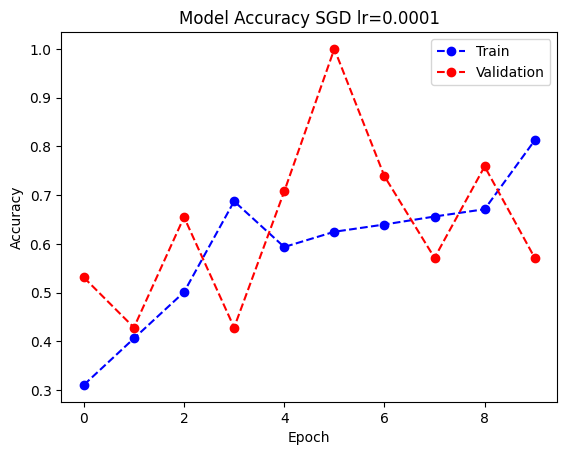

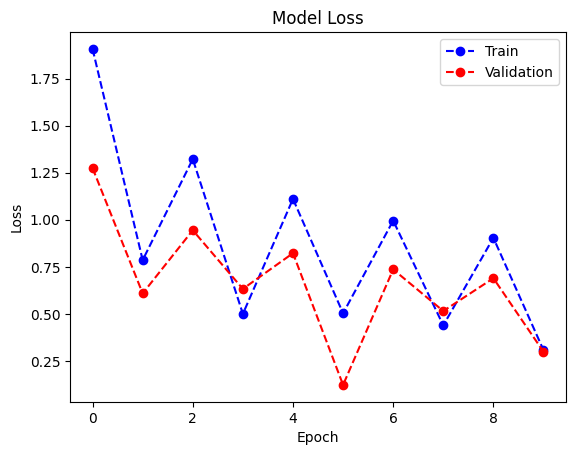

In [57]:
plt.plot(history3.history['accuracy'],'bo--', label='Train')
plt.plot(history3.history['val_accuracy'],'ro--', label='Validation')
plt.title('Model Accuracy SGD lr=0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history3.history['loss'],'bo--', label='Train')
plt.plot(history3.history['val_loss'],'ro--', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()  

In [58]:
from keras.applications import InceptionV3
re_model_Inc=InceptionV3(input_shape=(image_size, image_size, 3), include_top=False, weights="imagenet")
for layer in re_model_Inc.layers:
  layer.trainable=False
from keras.models import Sequential
from keras import layers
from tensorflow.keras import optimizers
optimizer = optimizers.Adam(learning_rate=0.0001)
model4 = Sequential([
    re_model_Inc,
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
      layers.Dense(6, activation='softmax')
  ])
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_478         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [59]:
history4 = model4.fit(train_set,epochs=10,
                                   steps_per_epoch=train_set.samples // batch_size,verbose=2,
                                  validation_data=val_set,
                                      validation_steps=val_set.samples // batch_size)

Epoch 1/10
131/131 - 54s - 409ms/step - accuracy: 0.7355 - loss: 0.7332 - val_accuracy: 0.8650 - val_loss: 0.3978
Epoch 2/10
131/131 - 0s - 4ms/step - accuracy: 0.8125 - loss: 0.2975 - val_accuracy: 1.0000 - val_loss: 0.0558
Epoch 3/10


2024-04-03 12:18:13.058756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/wsl/miniconda3/envs/tf/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-03 12:18:13.155439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 57s - 438ms/step - accuracy: 0.8207 - loss: 0.5049 - val_accuracy: 0.8594 - val_loss: 0.4177
Epoch 4/10
131/131 - 0s - 4ms/step - accuracy: 0.7812 - loss: 0.2558 - val_accuracy: 0.5714 - val_loss: 0.4990
Epoch 5/10


2024-04-03 12:19:11.028241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:19:11.149010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 59s - 447ms/step - accuracy: 0.8195 - loss: 0.4961 - val_accuracy: 0.8627 - val_loss: 0.3833
Epoch 6/10
131/131 - 1s - 4ms/step - accuracy: 0.8750 - loss: 0.2325 - val_accuracy: 1.0000 - val_loss: 0.0541
Epoch 7/10


2024-04-03 12:20:10.096162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:20:10.210227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 59s - 450ms/step - accuracy: 0.8264 - loss: 0.4546 - val_accuracy: 0.8605 - val_loss: 0.4101
Epoch 8/10
131/131 - 1s - 4ms/step - accuracy: 0.8438 - loss: 0.1920 - val_accuracy: 0.8571 - val_loss: 0.0809
Epoch 9/10


2024-04-03 12:21:09.630794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:21:09.752628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


131/131 - 58s - 443ms/step - accuracy: 0.8443 - loss: 0.4245 - val_accuracy: 0.8839 - val_loss: 0.3519
Epoch 10/10
131/131 - 1s - 5ms/step - accuracy: 0.6875 - loss: 0.3700 - val_accuracy: 1.0000 - val_loss: 0.1097


2024-04-03 12:22:08.416993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-03 12:22:08.513836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


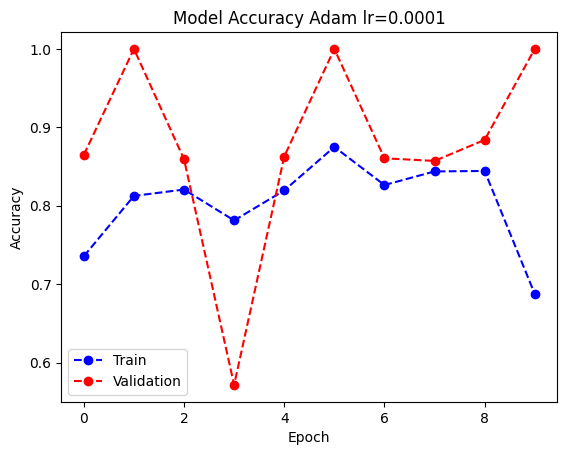

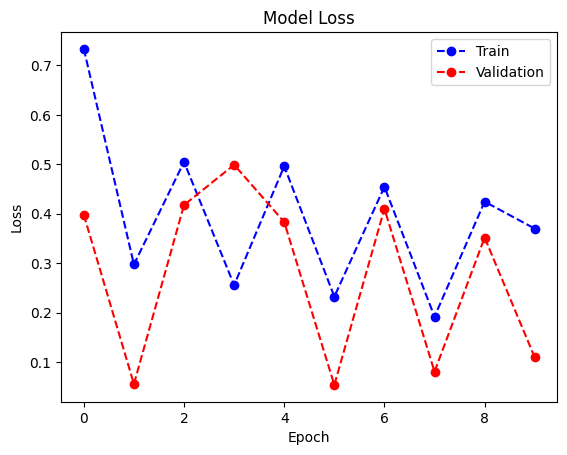

In [60]:
plt.plot(history4.history['accuracy'],'bo--', label='Train')
plt.plot(history4.history['val_accuracy'],'ro--', label='Validation')
plt.title('Model Accuracy Adam lr=0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history4.history['loss'],'bo--', label='Train')
plt.plot(history4.history['val_loss'],'ro--', label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()  

In [86]:

from fastai.vision.all import *
from pathlib import Path

train_path = Path('/home/wsl/hw/hw_24/archive/seg_train')
test_path = Path('/home/wsl/hw/hw_24/archive/seg_test')

# Создание DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                #    splitter=GrandparentSplitter(train_name='seg_train', valid_name='seg_test'),
                   item_tfms=Resize(224))




In [87]:
# Загрузка данных
dls = dblock.dataloaders(train_path, bs=16)

In [88]:
# Определение архитектуры модели
learn = vision_learner(dls, resnet18, metrics=accuracy)

In [89]:
# Обучение модели
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.430582,0.318501,0.909739,04:18
1,0.382401,0.346665,0.903800,04:10
2,0.175529,0.325233,0.916865,04:03
3,0.093770,0.318029,0.923990,04:10
4,0.054741,0.320548,0.920428,04:15


In [75]:
from fastai.interpret import ClassificationInterpretation

# Оценка модели на тестовых данных
interp = ClassificationInterpretation.from_learner(learn)


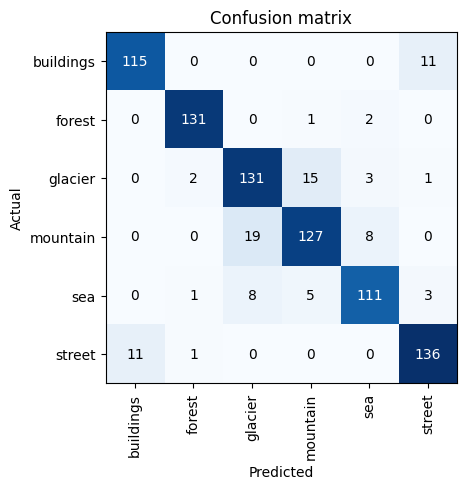

In [61]:
interp.plot_confusion_matrix()

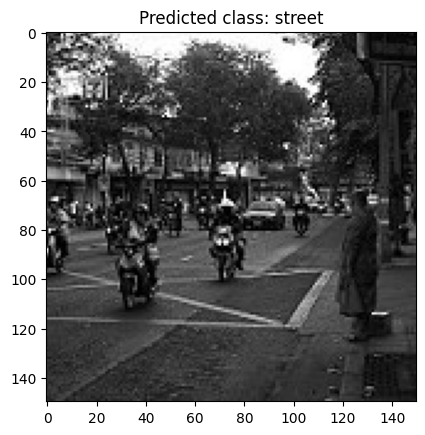

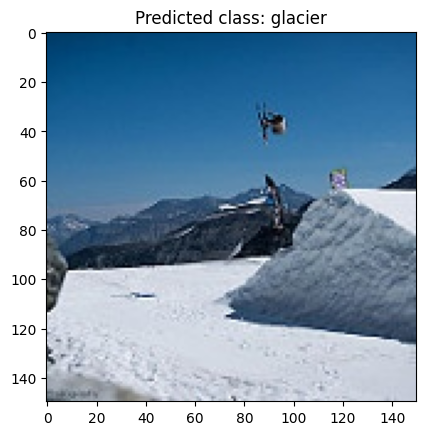

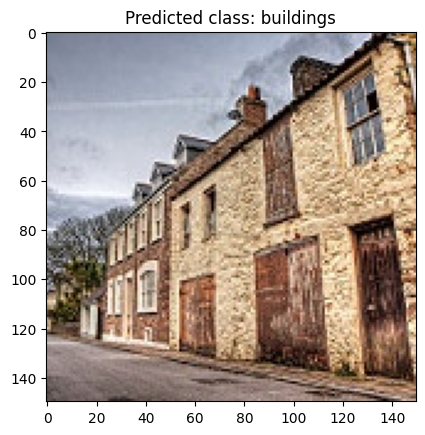

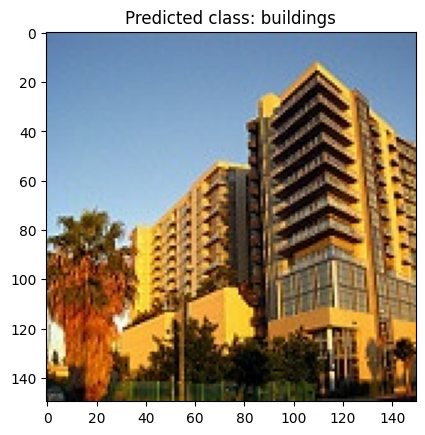

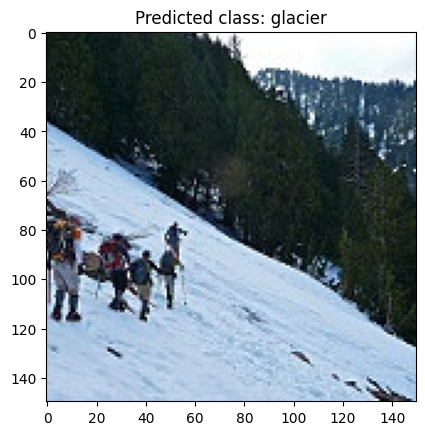

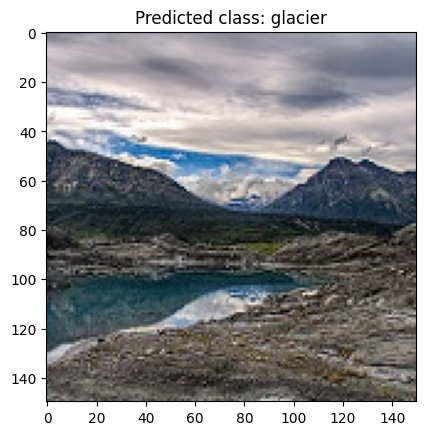

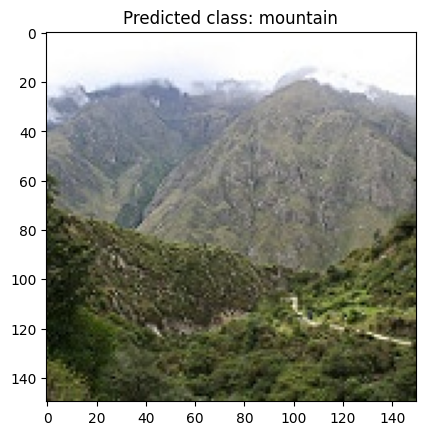

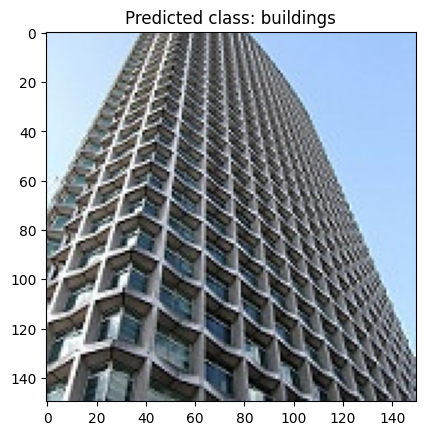

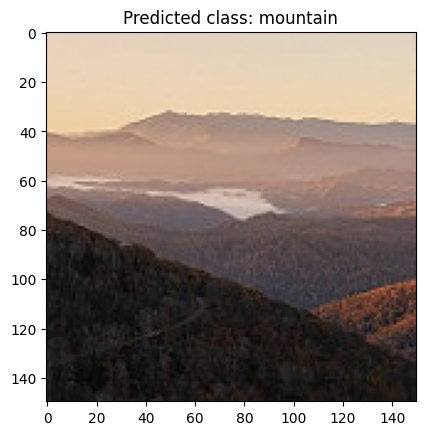

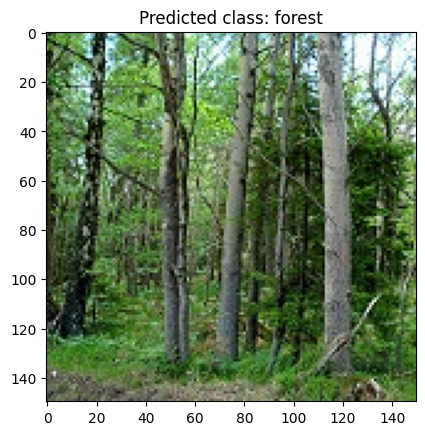

In [74]:
pr_files = get_image_files('/home/wsl/hw/hw_24/archive/seg_pred/seg_pred')[:10]
pr_dl = dls.test_dl(pr_files)
preds, _ = learn.get_preds(dl=pr_dl)
# Выводим предсказания
predictions = preds.argmax(dim=1)
for i in range(len(pr_files)):
    img = PILImage.create(pr_files[i])
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(f"Predicted class: {dls.vocab[predictions[i]]}")
    plt.show()

Вывод
в данном дз задача была классификация изображений. при использовании 1ой модели без файнтюнинга лучшие результаты:

131/131 - 0s - 592us/step - accuracy: 0.5625 - loss: 0.6768 - val_accuracy: 1.0000 - val_loss: 0.2135

тогда как при использовании файнтюнинга с моделью ResNet152V2 лучшие результаты:

131/131 - 3s - 20ms/step - accuracy: 0.9062 - loss: 0.1651 - val_accuracy: 0.8571 - val_loss: 0.3551

а InceptionV3 показал результаты хуже:

При этом оптимизатор Adam показал лучшие результаты,чем SGD

SGD:131/131 - 1s - 4ms/step - accuracy: 0.8125 - loss: 0.3076 - val_accuracy: 0.5714 - val_loss: 0.2989

Adam:131/131 - 1s - 4ms/step - accuracy: 0.8750 - loss: 0.2325 - val_accuracy: 1.0000 - val_loss: 0.0541

так же в дз использовался fastai, который показал достаточно хорошие результаты:

epoch	train_loss	valid_loss	accuracy	time

4	    0.054741   	0.320548	0.920428	04:15

данные лучше значений модели с файнтюнинга с  ResNet152V2

P.S. при использовании splitter=GrandparentSplitter(train_name='seg_train', valid_name='seg_test') выдавало ошибку 
/home/wsl/miniconda3/envs/tf/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
не знаю с чем это связано

P.S.S. я сократил размер данных на 70%, т.к. отсутствует GPU(